# #013 Multiple Linear Regression

In this code, we'll run a code that uses a Fama–French three-factor model to performs a multiple linear regression. <p>
Model is generetaded 120 months using random numpy library and ajusted by ordinary least squares. <p>
Finaly, results are ploted using sns, as #005, into a scatterplot matrix.
<p>
To predict Total Excess Return Fama-French model, uses three explanatory variables: market excess return (MKTRF), size (SMB) and value (HML). <p>
It be solved into a dataframe, if each column is a independent(X) variable, with predicted (Y) in last column.<p>

## 13.1 Estimate a Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your data
# Assuming you have a DataFrame `df` with columns: 'Mkt-RF', 'SMB', 'HML', 'Excess_Return'

# Example data
obs = 120
np.random.seed(0)
dates = pd.date_range('2020-01-01', periods= obs, freq='M')
df = pd.DataFrame({
    'MktRF': np.random.randn(obs),
    'SMB': np.random.randn(obs),
    'HML': np.random.randn(obs),
    'Excess_Return': np.random.randn(obs)
}, index=dates)

display(df)

,MktRF,SMB,HML,Excess_Return
2020-01-31,1.764052,0.376426,-0.637437,0.698457
2020-02-29,0.400157,-1.099401,-0.397272,0.003771
2020-03-31,0.978738,0.298238,-0.132881,0.931848
2020-04-30,2.240893,1.326386,-0.297791,0.339965
2020-05-31,1.867558,-0.694568,-0.309013,-0.015682
...,...,...,...,...
2029-08-31,0.802456,0.781198,-0.521189,0.994394
2029-09-30,0.947252,1.494485,-1.843070,1.319137
2029-10-31,-0.155010,-2.069985,-0.477974,-0.882419
2029-11-30,0.614079,0.426259,-0.479656,1.128594


In [6]:
# Define the Fama-French three-factor model
X = df[['MktRF', 'SMB', 'HML']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['Excess_Return']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Excess_Return   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9807
Date:                Wed, 18 Sep 2024   Prob (F-statistic):              0.404
Time:                        07:02:52   Log-Likelihood:                -166.78
No. Observations:                 120   AIC:                             341.6
Df Residuals:                     116   BIC:                             352.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0967      0.092     -1.050      0.2

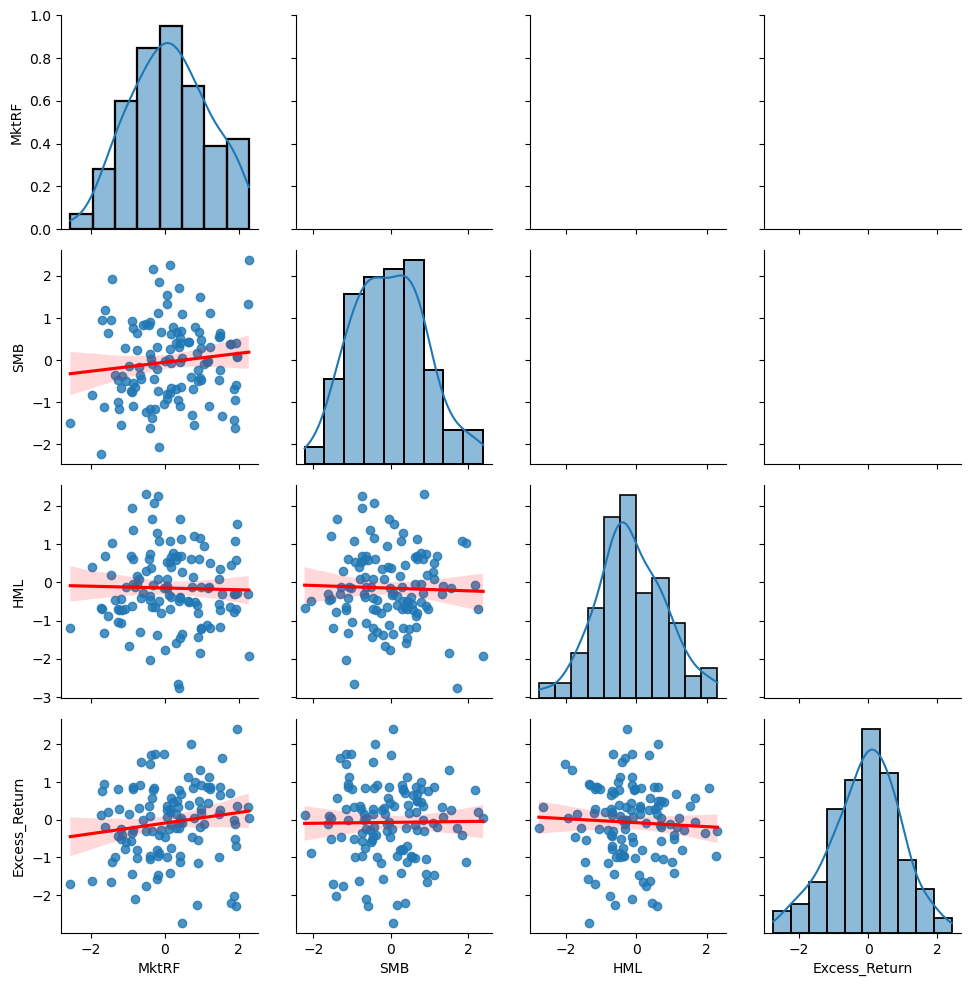

In [3]:
# Generate a scatterplot matrix

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.regplot,line_kws=dict(color="r"), ) #if no specified CI is 0.95
g.map_diag(sns.histplot, kde=True, lw=2, )

## 13.2 Visual Inspection

A better evaluation can be viewed into a Scatterplot with residuals against the dependent variable (Y^).<p>
We can use this scatterplot to uncover potential assumption violations and to help identify outliers in our data.<p>

Another scatterplot with residuals against independent variables to evaluate partial coeficients. 

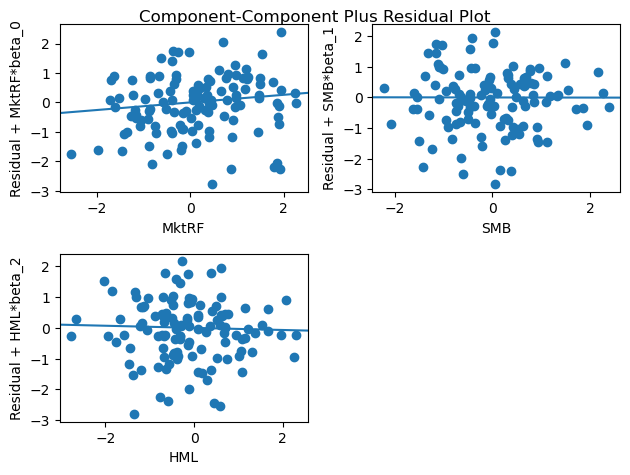

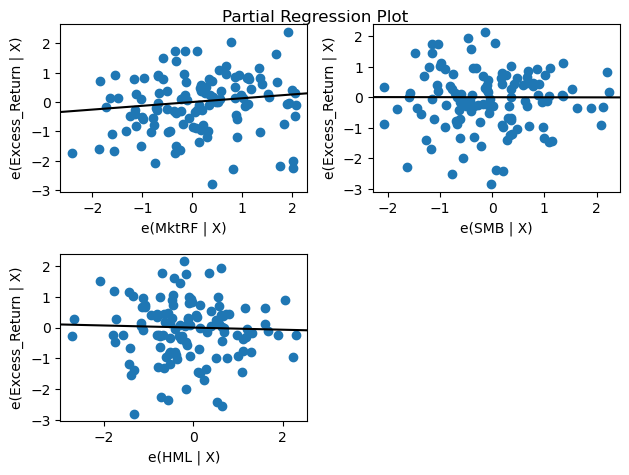

In [4]:
# analisys of residuals
# Residuals vs predicted value of dependent variable (Y^)
fig = sm.graphics.plot_ccpr_grid(model)
# fig.tight_layout(pad=1.0)
plt.show()

# Residuals vs Factors (independent variables)
fig = sm.graphics.plot_partregress_grid(model)
# fig.tight_layout(pad=1.0)
plt.show()

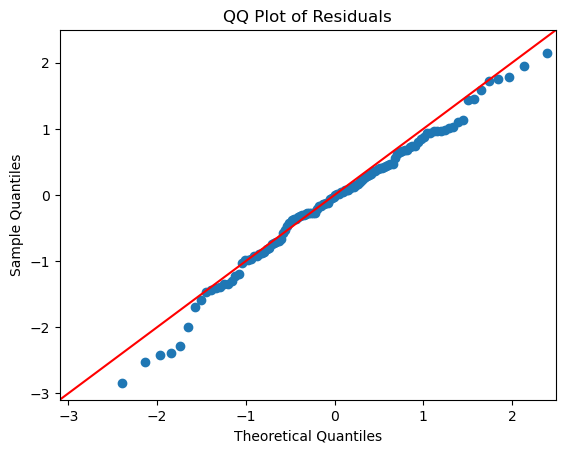

In [5]:
# Generate a QQ plot

sm.qqplot(model.resid, line='45')
plt.title('QQ Plot of Residuals')
plt.show()
